## Possibly trying to visualize *the sun*, probably

Okay, need to get the fits files from somewhere
Chatgpt suggested https://sdo.oma.be, which told me to get the sunpy library i think.

So i downloaded the sunpy library (and the astroquery one for later and added it to my base environment)

I unfortunately just dont have the time to try to understand/learn these 2 libraries (as of now), but ill try to get back to it whenenever i can and just chatgpt it for now


In [1]:
#importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from astropy.io import fits
from astropy.visualization import ZScaleInterval

#had to install sunpy (also installed astroquery for later)


In [2]:
#This should apparently hopefully get me a good quality fits file of the sun

#from sunpy.net import Fido, attrs as a
#import astropy.units as u

# Your original search query
#result = Fido.search(
    #a.Time('2025-01-01T00:00:00', '2025-01-01T00:00:10'),
    #a.Instrument('AIA'),
    #a.Wavelength(171*u.angstrom)
#)

# Fetch the data and save it directly to your current folder
# The 'path' argument gives you full control.
#downloaded_files = Fido.fetch(result, path="./my_sun_image.fits")

#print("Download complete!")
#print(f"File saved at: {downloaded_files}")
#Ok got the fits file

In [3]:
#Get hdu list from fits file

hdul = fits.open('aia171.fits')
hdul.info()

Filename: aia171.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  COMPRESSED_IMAGE    1 CompImageHDU    185   (4096, 4096)   int16   


In [4]:
#Examine primary hdu's header

hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

In [5]:
#Examine primary hdu's data

print(hdul[0].data)

None


So our primary hdu in the list has a header but no data, thus our second file 'compressed image' might have the image data

In [6]:
#Examine first extension hdu's header

hdul[1].header

 [astropy.io.fits.verify]


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 4096 / length of original image axis                  
NAXIS2  =                 4096 / length of original image axis                  
BLD_VERS= 'V9R5X'                                                               
LVL_NUM = 1.000000                                                              
T_REC   = '2025-01-01T00:00:10Z'                                                
TRECSTEP= 1.000000                                                              
TRECEPOC= '1977.01.01_00:00:00_TAI'                                             
TRECROUN=                    1                                                  
ORIGIN  = 'SDO/JSOC-SDP'                                                        
DATE    = '2025-01-12T18:57:

In [7]:
#Examine the data of extension hdu

hdul[1].data

array([[ 1.,  1.,  0., ...,  0., -1.,  0.],
       [ 0.,  0., -1., ...,  2.,  1.,  0.],
       [-2.,  0., -2., ...,  0., -1., -1.],
       ...,
       [ 1.,  2.,  1., ...,  0.,  0., -1.],
       [-2., -1.,  0., ..., -2.,  0., -1.],
       [-2.,  1.,  0., ...,  1., -1., -1.]], dtype=float32)

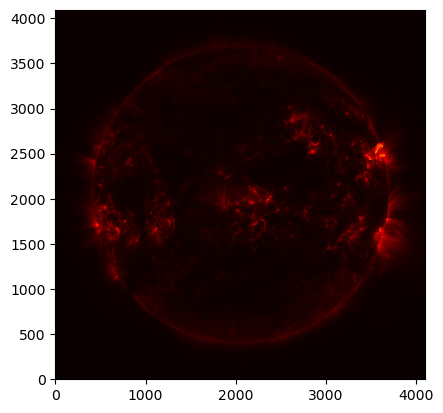

In [8]:
#It is clearly 'compressed' but idk what that means so imma just try to get output of image using matplotlib

plt.imshow(hdul[1].data, origin = 'lower', cmap = 'hot')

plt.show()

In [9]:
#Ok we wanna make this better so let's apply some cool scaling stuff

imageData = hdul[1].data

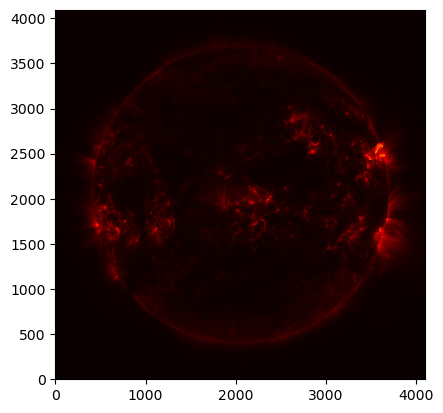

In [10]:
#Min-Max Scaling

imageMinMax = (imageData - imageData.min())/(imageData.max() - imageData.min())

plt.imshow(imageMinMax, origin = 'lower', cmap = 'hot')
plt.show()

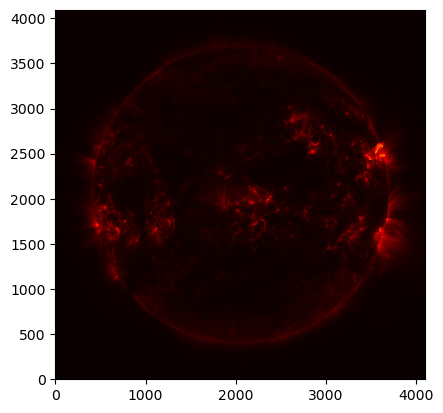

In [11]:
#Z Scaling

imageZ = (imageData - imageData.mean())/imageData.std()

plt.imshow(imageZ, origin = 'lower', cmap = 'hot')
plt.show()

C:\Users\vacha\AppData\Local\Temp\ipykernel_27632\122780562.py:3: RuntimeWarning: divide by zero encountered in log
  imageLog = np.log(imageData)
C:\Users\vacha\AppData\Local\Temp\ipykernel_27632\122780562.py:3: RuntimeWarning: invalid value encountered in log
  imageLog = np.log(imageData)


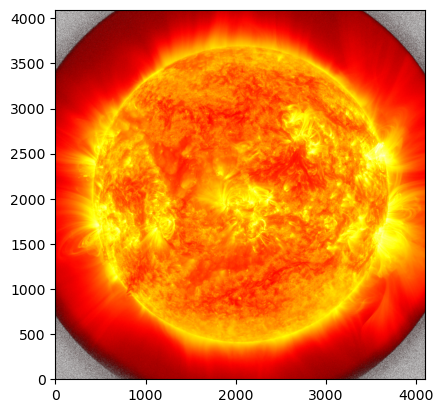

In [12]:
# Logarithmic scaling

imageLog = np.log(imageData)

plt.imshow(imageLog, origin = 'lower', cmap = 'hot')
plt.show()

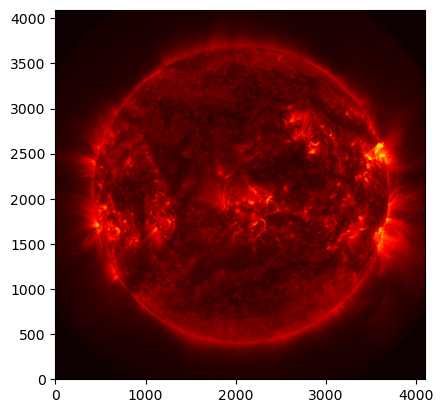

In [13]:
# Square root scaling (abs to avoid -ve problem)

imageSqrt = np.sqrt(np.abs(imageData))

plt.imshow(imageSqrt, origin = 'lower', cmap = 'hot')
plt.show()

Okay clearly the log scaling output looks majestic, but we have a problem with negative values and zero, let's see what we can do

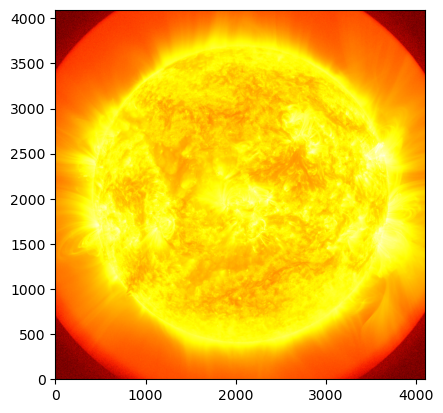

In [14]:
#Failed tests 

#Setting negative values to their positive equivalent might not give us the output we want since it doesnt make much sense
#imageLog2 = np.log(np.abs(imageData))
#plt.imshow(imageLog2, origin = 'lower', cmap = 'hot') (not better)

#Crazy we diluted the colors too much or smtg idek whats going on welp this looks worse fs
imageLog3 = np.log(np.select([imageData > 0, imageData == 0, imageData < 0], [imageData, 0.1, 0.01]))
plt.imshow(imageLog3, origin = 'lower', cmap = 'hot')
plt.show()

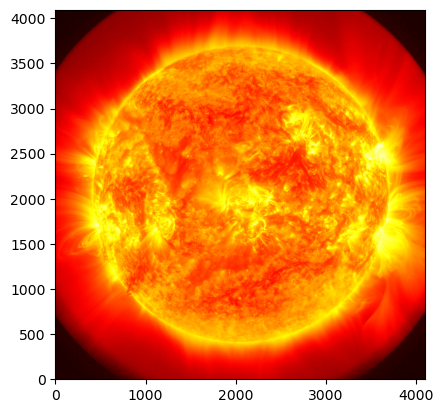

In [15]:
#Another attempt

imageLog4 = np.log(1 + np.select([imageData > 0, imageData == 0, imageData < 0], [imageData, 0, 0]))

plt.imshow(imageLog4, origin = 'lower', cmap = 'hot')
plt.show()
#Looks better for sure, ig lets stick with it

In [16]:
#Implementing ZScaleInterval to make it better

ZScaleInterval = ZScaleInterval()
vmin, vmax = ZScaleInterval.get_limits(imageLog4)

print(vmin, vmax)

0.0 8.455743


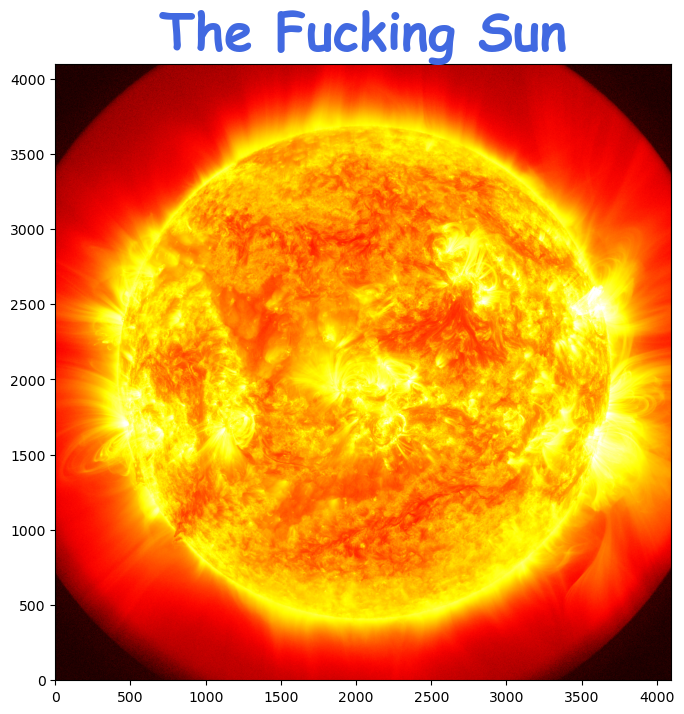

In [17]:
#Our final plot

plt.figure(figsize = (8, 8), dpi = 100)
plt.title("The Fucking Sun", fontdict = {'color': 'royalblue', 'weight' : 'bold', 'name': 'Comic Sans MS', 'size' : 36.9})
plt.imshow(imageLog4, cmap = 'hot', origin = 'lower', vmin = vmin, vmax = vmax)
plt.savefig('TheSun.png', dpi = 300)
plt.show()

### Looks so beautiful, best thing i have ever done in my life so far ngl

Let's make a plot of everything we have done to reach till here to finish things off

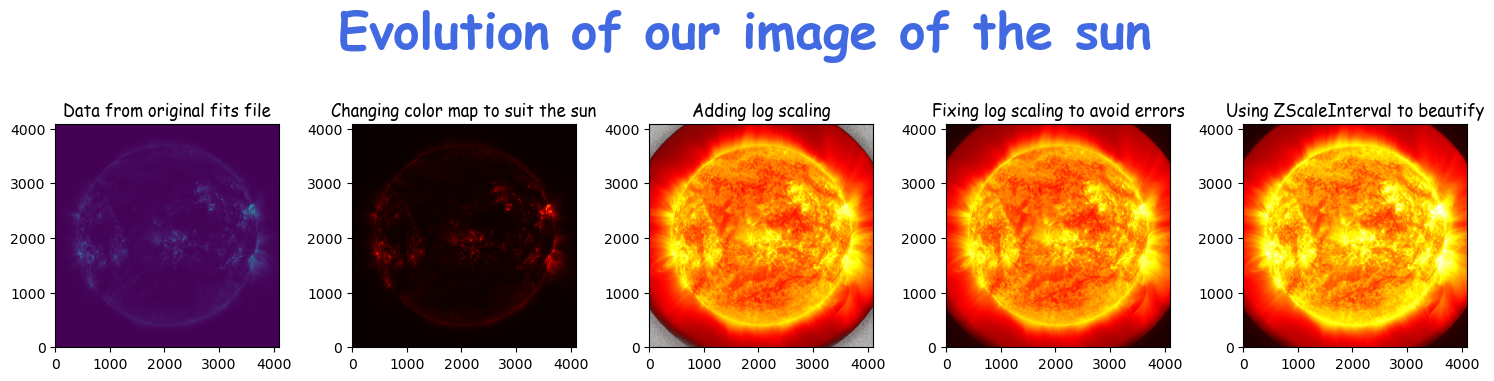

In [18]:
plt.figure(figsize =  (15, 4), dpi = 100)
plt.suptitle("Evolution of our image of the sun", color = 'royalblue', size  = 36, weight = 'bold', name = 'Comic Sans MS')

plt.subplot(1, 5, 1)
plt.title("Data from original fits file", fontdict = {'name': 'Comic Sans MS', 'size' : 12})
plt.imshow(imageData, origin = 'lower')

plt.subplot(1, 5, 2)
plt.title("Changing color map to suit the sun", fontdict = {'name': 'Comic Sans MS', 'size' : 12})
plt.imshow(imageData, origin = 'lower', cmap = 'hot')

plt.subplot(1, 5, 3)
plt.title("Adding log scaling", fontdict = {'name': 'Comic Sans MS', 'size' : 12})
plt.imshow(imageLog, origin = 'lower', cmap = 'hot')

plt.subplot(1, 5, 4)
plt.title("Fixing log scaling to avoid errors", fontdict = {'name': 'Comic Sans MS', 'size' : 12})
plt.imshow(imageLog4, origin = 'lower', cmap = 'hot')

plt.subplot(1, 5, 5)
plt.title("Using ZScaleInterval to beautify", fontdict = {'name': 'Comic Sans MS', 'size' : 12})
plt.imshow(imageLog4, origin = 'lower', cmap = 'hot', vmin = vmin, vmax = vmax)

plt.tight_layout()
plt.savefig('ProjectEvolution.png', dpi = 300)
plt.show()

## Project finished

This was the best project so far. The results are simply stunning. Had to learn sooo much to do this (ok not that much also)

But the visualizations of the sun getting better and better until they eventually reach the final product via ZScaleInterval, which just looks sooo beautiful was so fun to witness. 

The final product makes me so inspired and happy.

Anyways we visualized the sun from a fits file